<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 5: Practical - Lasso & Ridge Regression <br> <br>
<font color=686880 size=4>
    TAs: Alireza Dehghanpour - Arman Malekzadeh - Ali Salesi
    
____

### Full Name : Mohammad Abolnejadian
### Student Number : 98103867
### Colab Link:
___

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.

In this assignment you have to predict **life expectancy**.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Data Exploration (20 points)

In [2]:
!wget -O /content/dataset.csv "https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1"

--2023-05-11 18:25:45--  https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2kz21qjt40pjy43/train.csv [following]
--2023-05-11 18:25:45--  https://www.dropbox.com/s/dl/2kz21qjt40pjy43/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfeb1430fe328d088d8f119a47e.dl.dropboxusercontent.com/cd/0/get/B72mQQZ0sm_2A4IaFzSShgtbV5_PSn_7ucYHwvM1XgjHVySztUaNrdAnLb1nQDqRgaR7qHZX66GfZFFutd_b8ZOECMvlwQQ4nDRtGAbcrQf2mKGJFzJgmCwCrkpcGvX0zTX0QR31vsmgh5hGBjbvRC2ucnjguyNX0StGd8I-AnKBf0fX724Pie2Okr0nYnmnZY0/file?dl=1# [following]
--2023-05-11 18:25:46--  https://ucfeb1430fe328d088d8f119a47e.dl.dropboxusercontent.com/cd/0/get/B72mQQZ0sm_2A4IaFzSShgtbV5_PSn_7ucYHwvM1XgjHVySztUaNrdAnLb1nQDqRga

Load the dataset as a dataframe

In [3]:
df = pd.read_csv("dataset.csv")
df = df.rename(columns={"Life expectancy ": "Life expectancy"})
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Finland,2013,Developing,87.0,79.0,0,8.97,6115.496624,NaN,2,...,98.0,9.55,98.0,0.1,49638.771300,5438972.0,0.9,0.8,0.887,17.0
1,Japan,2015,Developed,83.7,55.0,2,NaN,0.000000,NaN,35,...,99.0,NaN,96.0,0.1,34474.137360,127141.0,2.1,1.8,0.902,15.3
2,Syrian Arab Republic,2014,Developing,64.4,294.0,7,0.01,0.000000,47.0,594,...,52.0,3.25,43.0,0.1,NaN,19239.0,6.3,6.1,0.575,9.0
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,Tunisia,2000,Developing,72.9,112.0,4,1.21,264.784220,94.0,47,...,97.0,5.40,97.0,0.1,2213.914880,9699197.0,6.6,6.5,0.646,12.8
2493,Myanmar,2001,Developing,62.5,239.0,72,0.38,1.917164,NaN,2519,...,77.0,1.80,73.0,0.4,138.924927,46627994.0,13.3,13.7,0.427,7.6
2494,Netherlands,2008,Developed,83.0,68.0,1,9.62,10873.405540,NaN,109,...,97.0,9.57,97.0,0.1,56928.824800,16445593.0,1.0,0.9,0.905,16.8
2495,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9


Plot "year" against "average life expectancy"

**It should have been plot "average life expectency" against "year".** [Read More](https://english.stackexchange.com/questions/107800/is-x-plotted-against-y-or-is-y-plotted-against-x)

<Axes: title={'center': 'Life expectancy for all countries through years'}, xlabel='Year'>

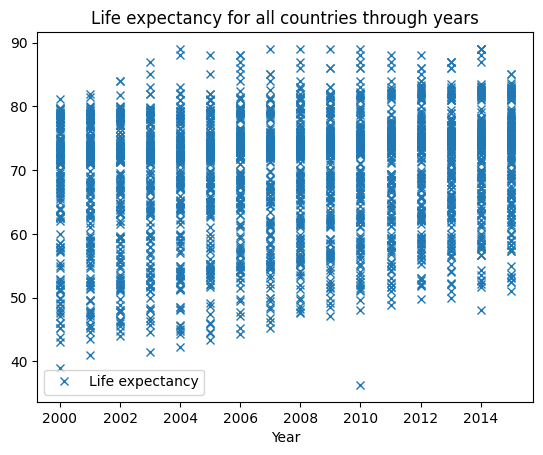

In [4]:
df.plot(x="Year", y="Life expectancy", style='x', title='Life expectancy for all countries through years')

<Axes: title={'center': 'Life expectancy through years'}, xlabel='Year'>

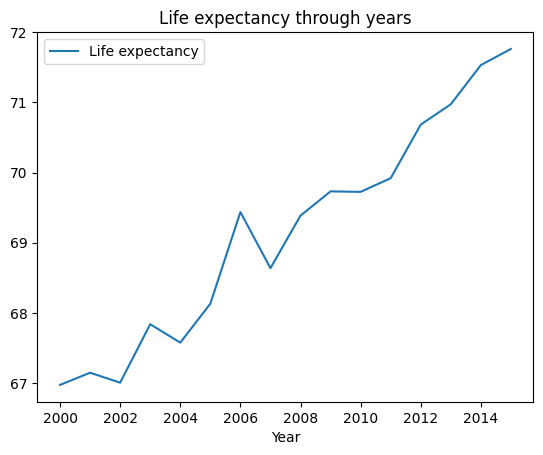

In [5]:
df.groupby("Year", as_index=False)["Life expectancy"].mean().plot(x="Year", y="Life expectancy", title='Life expectancy through years')

Compare the average life expectancy of "Developed" and "Developing" countries for each year 

In [6]:
average_life_expectancy_based_on_status = df.groupby(["Year", "Status"], as_index=False)["Life expectancy"].mean()
average_life_expectancy_based_on_status

,Year,Status,Life expectancy
0,2000,Developed,76.891667
1,2000,Developing,65.004959
2,2001,Developed,77.114286
3,2001,Developing,65.048120
4,2002,Developed,77.710000
5,2002,Developing,64.393496
6,2003,Developed,78.257692
7,2003,Developing,65.617213
8,2004,Developed,78.452000
9,2004,Developing,65.500000


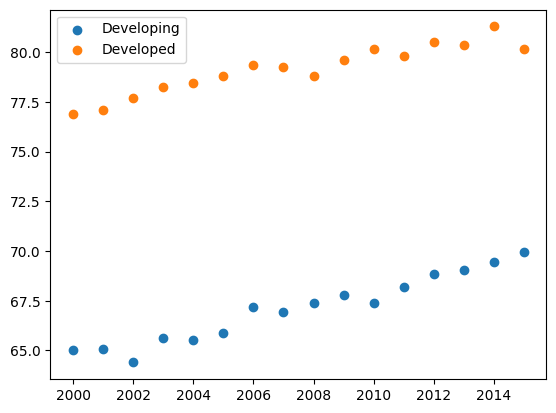

In [7]:
import matplotlib.pyplot as plt
developing_df = average_life_expectancy_based_on_status.loc[average_life_expectancy_based_on_status['Status'] == "Developing"]
developed_df = average_life_expectancy_based_on_status.loc[average_life_expectancy_based_on_status['Status'] == "Developed"]
plt.scatter(x = developing_df.loc[:, "Year"], y = developing_df.loc[:, "Life expectancy"])
plt.scatter(x = developed_df.loc[:, "Year"], y = developed_df.loc[:, "Life expectancy"])
status = ['Developing', 'Developed']
plt.legend(labels=status)
plt.show()

# average_life_expectancy_based_on_status.plot(x="Year", y="Life expectancy", style = 'x',title='Life expectancy through years')

Get the correlation between "Life expectancy" and "GDP"

In [8]:
correlation_lifeexpectancy_gdp = df['Life expectancy'].corr(df['GDP'])
correlation_lifeexpectancy_gdp

0.4652553879500644

Find out the feature having the strongest correlation with the "Life expectancy"<br>
Note: Do not display all of the correlation values. Your code should only print the result (the name of a column).

In [9]:
correlation = df.drop(columns = ["Country", "Status"]).corr()['Life expectancy']
correlation = correlation.drop('Life expectancy').abs()
max_correlation = correlation.max()
max_correlation_column = correlation.idxmax()
print(str(max_correlation_column) + ": " + str(max_correlation))

Schooling: 0.7503972851868812


# Preprocessing (20 points)

Remove the rows containing NaN (or null) values

In [10]:
df = df.dropna()
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
7,Colombia,2005,Developing,73.1,144.0,15,4.38,531.980818,93.0,0,...,93.0,5.82,93.0,0.1,3386.256000,43285634.0,2.4,2.1,0.658,11.1
11,Botswana,2012,Developing,63.4,3.0,2,0.01,12.834474,95.0,7,...,96.0,6.27,95.0,4.4,729.231453,289315.0,7.3,7.0,0.687,12.5
12,Mexico,2014,Developing,76.6,122.0,31,5.26,168.173753,84.0,3,...,87.0,6.30,87.0,0.1,1452.277660,1242216.0,1.6,1.5,0.754,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,Mauritius,2009,Developing,72.8,166.0,0,2.83,624.236183,99.0,15,...,99.0,4.97,99.0,0.1,7318.126410,1247429.0,7.3,7.3,0.734,13.8
2485,Mali,2009,Developing,56.0,276.0,55,0.59,84.634389,71.0,2939,...,77.0,6.85,73.0,1.6,697.153124,1466597.0,9.0,8.8,0.385,7.1
2488,Turkmenistan,2008,Developing,64.5,235.0,6,2.40,34.239794,96.0,0,...,96.0,1.93,96.0,0.1,394.467675,4935762.0,3.2,3.3,0.000,10.5
2490,Angola,2007,Developing,48.2,375.0,87,6.35,184.821345,73.0,1014,...,75.0,3.38,73.0,2.6,2878.837144,2997687.0,9.6,9.6,0.454,7.7


Convert categorical columns into their one-hot encoded versions

In [11]:
df = pd.get_dummies(df, columns=['Country', 'Status'])
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
3,2010,72.8,18.0,0,9.80,1109.969508,91.0,0,58.9,0,...,0,0,0,0,0,0,0,0,1,0
4,2013,67.1,192.0,0,0.01,200.660099,97.0,0,29.3,0,...,0,0,0,0,0,0,0,0,0,1
7,2005,73.1,144.0,15,4.38,531.980818,93.0,0,5.5,18,...,0,0,0,0,0,0,0,0,0,1
11,2012,63.4,3.0,2,0.01,12.834474,95.0,7,36.2,3,...,0,0,0,0,0,0,0,0,0,1
12,2014,76.6,122.0,31,5.26,168.173753,84.0,3,62.8,36,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,2009,72.8,166.0,0,2.83,624.236183,99.0,15,3.2,0,...,0,0,0,0,0,0,0,0,0,1
2485,2009,56.0,276.0,55,0.59,84.634389,71.0,2939,2.2,93,...,0,0,0,0,0,0,0,0,0,1
2488,2008,64.5,235.0,6,2.40,34.239794,96.0,0,42.7,8,...,1,0,0,0,0,0,0,0,0,1
2490,2007,48.2,375.0,87,6.35,184.821345,73.0,1014,18.8,138,...,0,0,0,0,0,0,0,0,0,1


Convert the dataframe into two numpy arrays (called `x` and `y`).<br>
To make the first array, remove the "Life expectancy" column, and convert the remaining dataframe to a numpy array.<br>
Then, use the removed column to make another numpy array (`y`).

In [12]:
x_df = df.drop("Life expectancy", axis = 1)
x = x_df.to_numpy()
y = df.loc[:, "Life expectancy"].values
x, y

(array([[2.010e+03, 1.800e+01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         0.000e+00],
        [2.013e+03, 1.920e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        [2.005e+03, 1.440e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        ...,
        [2.008e+03, 2.350e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        [2.007e+03, 3.750e+02, 8.700e+01, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        [2.000e+03, 1.120e+02, 4.000e+00, ..., 0.000e+00, 0.000e+00,
         1.000e+00]]),
 array([72.8, 67.1, 73.1, ..., 64.5, 48.2, 72.9]))

Normalize the data

In [13]:
x = preprocessing.normalize(x)
x

array([[6.74996354e-03, 6.04474347e-05, 0.00000000e+00, ...,
        0.00000000e+00, 3.35819082e-06, 0.00000000e+00],
       [1.06367098e-01, 1.01452970e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.28400884e-05],
       [4.63202177e-05, 3.32673883e-06, 3.46535295e-07, ...,
        0.00000000e+00, 0.00000000e+00, 2.31023530e-08],
       ...,
       [4.06826712e-04, 4.76116918e-05, 1.21561766e-06, ...,
        0.00000000e+00, 0.00000000e+00, 2.02602944e-07],
       [6.69515692e-04, 1.25096355e-04, 2.90223544e-05, ...,
        0.00000000e+00, 0.00000000e+00, 3.33590280e-07],
       [2.06202627e-04, 1.15473471e-05, 4.12405255e-07, ...,
        0.00000000e+00, 0.00000000e+00, 1.03101314e-07]])

# Model Training

Split the data to training (80%) and testing (20%) parts (5 points)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)
X_train, y_train

(array([[2.56443445e-01, 2.33943920e-02, 1.27838208e-03, ...,
         0.00000000e+00, 0.00000000e+00, 1.27838208e-04],
        [1.09595114e-04, 6.94193491e-06, 4.91948143e-07, ...,
         0.00000000e+00, 0.00000000e+00, 5.46609048e-08],
        [2.97773224e-03, 2.29511933e-04, 1.48072215e-05, ...,
         0.00000000e+00, 0.00000000e+00, 1.48072215e-06],
        ...,
        [3.11723605e-05, 2.18097475e-07, 6.38714034e-07, ...,
         0.00000000e+00, 0.00000000e+00, 1.55783911e-08],
        [2.25263815e-02, 2.41795907e-03, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.12463213e-05],
        [1.67705768e-03, 1.00322493e-05, 2.50806233e-06, ...,
         0.00000000e+00, 0.00000000e+00, 8.36020777e-07]]),
 array([65.9, 73.5, 74.1, ..., 78. , 64.7, 74.4]))

# Common Regression Class

This is a regression class and you do not need to change its code. You have to fully understand it and then create new classes for rigde and lasso regression which inherit from this class.
For initialization you have to specify learning rate, number of iteration, and a regularization object.

In [15]:
class Regression:
    def __init__(self, learning_rate, iteration, regularization):
        
        self.N = None # number of samples
        self.n = None # number of features
        self.w = None # initial weights
        self.regularization = regularization # will be the l1/l2 regularization class according to the regression model
        self.lr = learning_rate
        self.it = iteration

    def loss_function(self, y, y_pred):
        return (1 / (2*self.N)) * np.sum(np.square(y_pred - y)) + self.regularization(self.w)
    
    def hypothesis(self, weights, X):
        return np.dot(X, weights)

    def train(self, X, y):
        # Target value should be in the shape of (n, 1) not (n, ).

        # Insert constant ones for bias weights.
        X = np.insert(X, 0, 1, axis=1)

        self.N = X.shape[0]
        self.n = X.shape[1]
        self.w = np.zeros((self.n , 1))

        for it in range(1, self.it+1):
            y_pred = self.hypothesis(self.w, X)
            cost = self.loss_function(y, y_pred)
            dw = (1/self.N) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
            self.w = self.w - self.lr * dw

            if it % 10 == 0:
                print("The loss function for the iteration {}----->{} :)".format(it, cost))
    
    def predict(self, test_X):
        # Insert constant ones for bias weights.
        test_X = np.insert(test_X, 0, 1, axis=1)
        y_pred = self.hypothesis(self.w, test_X)
        return y_pred

# Regularization Classes (20 points)

You have to implement l2/l1 regularization.

In [16]:
class l1_regularization:
    """Regularization used for Lasso Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be returned when we call this class."
        return self.lamda * np.sum(np.abs(weights))
        
    
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        return self.lamda * np.sign(weights)
        


class l2_regularization:
    """Regularization used for Ridge Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be retuned when we call this class."
        return self.lamda * np.sum(np.square(weights))
    
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        # return 2 * self.lamda * np.sum(weights)
        return 2 * self.lamda * weights

# Lasso Regression from scratch (5 points)

Train a lasso regression model using your own code and the following class.

In [17]:
class LassoRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l1_regularization(lamda)
        super(LassoRegression, self).__init__(learning_rate, iteration, self.regularization)

In [18]:
lasso_regression_custom = LassoRegression(0.01, 1e-2, 10000)
y_train_reshaped = y_train.reshape(-1, 1)
lasso_regression_custom.train(X_train, y_train_reshaped)

The loss function for the iteration 10----->1729.1724224751358 :)
The loss function for the iteration 20----->1185.1427844246878 :)
The loss function for the iteration 30----->817.6992440659516 :)
The loss function for the iteration 40----->569.510673614206 :)
The loss function for the iteration 50----->401.8593900461504 :)
The loss function for the iteration 60----->288.5980136075604 :)
The loss function for the iteration 70----->212.0683241840306 :)
The loss function for the iteration 80----->160.34511729744509 :)
The loss function for the iteration 90----->125.37488738875452 :)
The loss function for the iteration 100----->101.7188288952608 :)
The loss function for the iteration 110----->85.7039236336268 :)
The loss function for the iteration 120----->74.84965408609176 :)
The loss function for the iteration 130----->67.48084168049179 :)
The loss function for the iteration 140----->62.46617461830971 :)
The loss function for the iteration 150----->59.041643994357244 :)
The loss functio

# Lasso Regression using skicit-learn (5 points)

Use `sklearn` to train a Lasso Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [19]:
params = {'alpha': (np.logspace(-8, 8, 100))}
lasso_regression_sklearn = Lasso(max_iter=10000)
lasso_model = GridSearchCV(lasso_regression_sklearn, params, cv = 10)
lasso_model.fit(X_train, y_train_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.818e+04, tolerance: 7.531e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.705e+04, tolerance: 7.466e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.791e+04, tolerance: 7.470e

GridSearchCV(cv=10, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8....
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

# Ridge Regression From scratch (5 points)

Train a ridge regression model using your own code and the following class.

In [20]:
class RidgeRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l2_regularization(lamda)
        super(RidgeRegression, self).__init__(learning_rate, iteration, self.regularization)

In [21]:
ridge_regression_custom = RidgeRegression(0.001, 1e-2, 20000)
y_train_reshaped = y_train.reshape(-1, 1)
ridge_regression_custom.train(X_train, y_train_reshaped)

The loss function for the iteration 10----->1729.0773058230477 :)
The loss function for the iteration 20----->1185.172057821407 :)
The loss function for the iteration 30----->817.9613874870652 :)
The loss function for the iteration 40----->570.0303000824639 :)
The loss function for the iteration 50----->402.6202937211041 :)
The loss function for the iteration 60----->289.5670967270054 :)
The loss function for the iteration 70----->213.20828372515766 :)
The loss function for the iteration 80----->161.6206757581874 :)
The loss function for the iteration 90----->126.75542284842035 :)
The loss function for the iteration 100----->103.17907501889032 :)
The loss function for the iteration 110----->87.22373117284641 :)
The loss function for the iteration 120----->76.4133395927257 :)
The loss function for the iteration 130----->69.07641702753938 :)
The loss function for the iteration 140----->64.08461129395707 :)
The loss function for the iteration 150----->60.6762156521807 :)
The loss function

# Ridge Regression using scikit-learn (5 points)

Use `sklearn` to train a Ridge Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [22]:
params = {'alpha': (np.logspace(-8, 8, 100))}
ridge_regression_sklearn = Ridge(max_iter=10000)
ridge_model = GridSearchCV(ridge_regression_sklearn, params, cv = 10)
ridge_model.fit(X_train, y_train_reshaped)

GridSearchCV(cv=10, estimator=Ridge(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8....
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

# Evaluation (15 points)

For each model (the 2 models trained using `sklearn` and the ones based on your code), predict the output for the testing samples.

In [23]:
y_pred_lasso_custom = lasso_regression_custom.predict(X_test)
y_pred_lasso_sklearn = lasso_model.predict(X_test)
y_pred_ridge_custom = ridge_regression_custom.predict(X_test)
y_pred_ridge_sklearn = ridge_model.predict(X_test)

Measure the performance of the models based on "mean squared error" and the "coefficient of determination" of the prediction.

In [27]:
#Custom Lasso
mse_lasso_custom = mean_squared_error(y_test, y_pred_lasso_custom)
r2_lasso_custom = r2_score(y_test, y_pred_lasso_custom)
print("Custom Lasso:" + "\n" + "MSE: " + str(mse_lasso_custom) + "\n" + "R2: " + str(r2_lasso_custom) + "\n")

#Sklearn Lasso
mse_lasso_sklearn = mean_squared_error(y_test, y_pred_lasso_sklearn)
r2_lasso_sklearn = r2_score(y_test, y_pred_lasso_sklearn)
print("Sklearn Lasso:" + "\n" + "MSE: " + str(mse_lasso_sklearn) + "\n" + "R2: " + str(r2_lasso_sklearn) + "\n")

#Custom Ridge
mse_ridge_custom = mean_squared_error(y_test, y_pred_ridge_custom)
r2_ridge_custom = r2_score(y_test, y_pred_ridge_custom)
print("Custom Ridge:" + "\n" + "MSE: " + str(mse_ridge_custom) + "\n" + "R2: " + str(r2_ridge_custom) + "\n")

#Sklearn Ridge
mse_ridge_sklearn = mean_squared_error(y_test, y_pred_ridge_sklearn)
r2_ridge_sklearn = r2_score(y_test, y_pred_ridge_sklearn)
print("Sklearn Ridge:" + "\n" + "MSE: " + str(mse_ridge_sklearn) + "\n" + "R2: " + str(r2_ridge_sklearn) + "\n")

Custom Lasso:
MSE: 78.1737756345305
R2: 0.014108361846872697

Sklearn Lasso:
MSE: 74.87432600898913
R2: 0.05571950023599581

Custom Ridge:
MSE: 77.88756975083413
R2: 0.017717858576896783

Sklearn Ridge:
MSE: 74.84371248472534
R2: 0.05610558389820974



# Kaggle

Competition Link: https://www.kaggle.com/t/adbf95666e7c4f41a6be1129a9e4415c

In [26]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammadabolnejadian","key":"63ee2f88a756c683494eba9ae099ffb0"}'}

In [28]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [32]:
! kaggle competitions download -c sharif-ml-1401-c5
! unzip sharif-ml-1401-c5.zip

sharif-ml-1401-c5.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sharif-ml-1401-c5.zip
  inflating: assignment5-test-data-sample-submission.csv  
  inflating: assignment5-test-data.csv  
  inflating: assignment5-training-data.csv  


In [120]:
train_df = pd.read_csv("assignment5-training-data.csv")
train_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Finland,2013,Developing,87.0,79.0,0,8.97,6115.496624,NaN,2,...,98.0,9.55,98.0,0.1,49638.771300,5438972.0,0.9,0.8,0.887,17.0
1,Japan,2015,Developed,83.7,55.0,2,NaN,0.000000,NaN,35,...,99.0,NaN,96.0,0.1,34474.137360,127141.0,2.1,1.8,0.902,15.3
2,Syrian Arab Republic,2014,Developing,64.4,294.0,7,0.01,0.000000,47.0,594,...,52.0,3.25,43.0,0.1,NaN,19239.0,6.3,6.1,0.575,9.0
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,Tunisia,2000,Developing,72.9,112.0,4,1.21,264.784220,94.0,47,...,97.0,5.40,97.0,0.1,2213.914880,9699197.0,6.6,6.5,0.646,12.8
2493,Myanmar,2001,Developing,62.5,239.0,72,0.38,1.917164,NaN,2519,...,77.0,1.80,73.0,0.4,138.924927,46627994.0,13.3,13.7,0.427,7.6
2494,Netherlands,2008,Developed,83.0,68.0,1,9.62,10873.405540,NaN,109,...,97.0,9.57,97.0,0.1,56928.824800,16445593.0,1.0,0.9,0.905,16.8
2495,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9


In [121]:
test_df = pd.read_csv("assignment5-test-data.csv")
#Align
test_df_aligned, train_df_aligned = test_df.align(train_df, axis = 1)
test_df_aligned = test_df_aligned.drop(columns = 'ID')
train_df_aligned = train_df_aligned.drop(columns = 'ID')
test_df_aligned

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Country,Diphtheria,GDP,Hepatitis B,...,Measles,Polio,Population,Schooling,Status,Total expenditure,Year,infant deaths,percentage expenditure,under-five deaths
0,67.6,0.1,0.8,0.7,62,7.91,Malta,76.0,2187.794690,75.0,...,0,76.0,41458.0,14.6,Developed,8.30,2010,0,278.068705,0
1,36.5,4.6,4.5,4.6,3,6.64,Haiti,53.0,329.782946,NaN,...,0,56.0,8976552.0,8.1,Developing,5.32,2003,18,44.256871,25
2,45.0,0.3,5.5,5.3,218,7.56,Guyana,98.0,3944.178173,98.0,...,0,98.0,75881.0,10.3,Developing,5.10,2013,0,345.904426,1
3,51.7,0.1,2.8,2.8,135,7.53,Serbia,93.0,1634.875610,NaN,...,35,93.0,753433.0,13.1,Developing,6.89,2001,1,222.506571,1
4,64.5,0.1,0.7,0.7,69,6.53,Malta,89.0,1519.549700,85.0,...,4,89.0,41268.0,14.2,Developed,8.46,2004,0,203.315750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,46.7,0.4,1.4,1.4,144,4.03,Peru,95.0,259.192958,NaN,...,0,95.0,2661467.0,13.9,Developing,4.94,2002,16,40.537779,20
437,23.2,0.3,9.9,9.7,196,0.26,Senegal,92.0,148.912351,92.0,...,17,89.0,141232.0,8.7,Developing,4.51,2013,20,11.838532,28
438,19.2,13.6,6.9,6.8,487,2.08,Zambia,8.0,114.587985,8.0,...,535,77.0,12725974.0,11.1,Developing,4.37,2007,32,10.851482,51
439,51.4,0.1,3.8,3.8,14,8.51,Barbados,91.0,15534.157400,91.0,...,0,91.0,NaN,15.5,Developing,6.67,2011,0,173.982563,0


### Preprocess

In [122]:
# test_df_aligned = test_df_aligned.dropna()
# train_df_aligned = train_df_aligned.dropna()
#We replace NaN values with mean of each column instead of dropping the rows
test_df_aligned = test_df_aligned.fillna(test_df_aligned.mean())
train_df_aligned = train_df_aligned.fillna(train_df_aligned.mean())
test_df_aligned

<ipython-input-122-f2c8cefd4f59>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df_aligned = test_df_aligned.fillna(test_df_aligned.mean())
<ipython-input-122-f2c8cefd4f59>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df_aligned = train_df_aligned.fillna(train_df_aligned.mean())


,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Country,Diphtheria,GDP,Hepatitis B,...,Measles,Polio,Population,Schooling,Status,Total expenditure,Year,infant deaths,percentage expenditure,under-five deaths
0,67.6,0.1,0.8,0.7,62,7.91,Malta,76.0,2187.794690,75.000000,...,0,76.0,4.145800e+04,14.600000,Developed,8.30,2010,0,278.068705,0
1,36.5,4.6,4.5,4.6,3,6.64,Haiti,53.0,329.782946,80.759207,...,0,56.0,8.976552e+06,8.100000,Developing,5.32,2003,18,44.256871,25
2,45.0,0.3,5.5,5.3,218,7.56,Guyana,98.0,3944.178173,98.000000,...,0,98.0,7.588100e+04,10.300000,Developing,5.10,2013,0,345.904426,1
3,51.7,0.1,2.8,2.8,135,7.53,Serbia,93.0,1634.875610,80.759207,...,35,93.0,7.534330e+05,13.100000,Developing,6.89,2001,1,222.506571,1
4,64.5,0.1,0.7,0.7,69,6.53,Malta,89.0,1519.549700,85.000000,...,4,89.0,4.126800e+04,14.200000,Developed,8.46,2004,0,203.315750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,46.7,0.4,1.4,1.4,144,4.03,Peru,95.0,259.192958,80.759207,...,0,95.0,2.661467e+06,13.900000,Developing,4.94,2002,16,40.537779,20
437,23.2,0.3,9.9,9.7,196,0.26,Senegal,92.0,148.912351,92.000000,...,17,89.0,1.412320e+05,8.700000,Developing,4.51,2013,20,11.838532,28
438,19.2,13.6,6.9,6.8,487,2.08,Zambia,8.0,114.587985,8.000000,...,535,77.0,1.272597e+07,11.100000,Developing,4.37,2007,32,10.851482,51
439,51.4,0.1,3.8,3.8,14,8.51,Barbados,91.0,15534.157400,91.000000,...,0,91.0,9.992214e+06,15.500000,Developing,6.67,2011,0,173.982563,0


In [123]:
#One-Hot Encoding
test_df_aligned_encoded = pd.get_dummies(test_df_aligned, columns=['Country', 'Status'])
train_df_aligned_encoded = pd.get_dummies(train_df_aligned, columns=['Country', 'Status'])
test_df_aligned_encoded

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,67.6,0.1,0.8,0.7,62,7.91,76.0,2187.794690,75.000000,0.819000,...,0,0,0,0,0,0,0,0,1,0
1,36.5,4.6,4.5,4.6,3,6.64,53.0,329.782946,80.759207,0.447000,...,0,0,0,0,0,0,0,0,0,1
2,45.0,0.3,5.5,5.3,218,7.56,98.0,3944.178173,98.000000,0.633000,...,0,0,0,0,0,0,0,0,0,1
3,51.7,0.1,2.8,2.8,135,7.53,93.0,1634.875610,80.759207,0.709000,...,0,0,0,0,0,0,0,0,0,1
4,64.5,0.1,0.7,0.7,69,6.53,89.0,1519.549700,85.000000,0.797000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,46.7,0.4,1.4,1.4,144,4.03,95.0,259.192958,80.759207,0.686000,...,0,0,0,0,0,0,0,0,0,1
437,23.2,0.3,9.9,9.7,196,0.26,92.0,148.912351,92.000000,0.474000,...,0,0,0,0,0,0,0,0,0,1
438,19.2,13.6,6.9,6.8,487,2.08,8.0,114.587985,8.000000,0.492000,...,0,0,0,0,0,0,1,0,0,1
439,51.4,0.1,3.8,3.8,14,8.51,91.0,15534.157400,91.000000,0.780000,...,0,0,0,0,0,0,0,0,0,1


In [124]:
#Align
test_df_aligned_encoded_aligned, train_df_aligned_encoded_aligned = test_df_aligned_encoded.align(train_df_aligned_encoded, axis = 1)
#fill nans with 0 (Country doesn't exist)
test_df_aligned_encoded_aligned = test_df_aligned_encoded_aligned.fillna(0)
train_df_aligned_encoded_aligned = train_df_aligned_encoded_aligned.fillna(0)
test_df_aligned_encoded_aligned

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,...,Polio,Population,Schooling,Status_Developed,Status_Developing,Total expenditure,Year,infant deaths,percentage expenditure,under-five deaths
0,67.6,0.1,0.8,0.7,62,7.91,0,0,0,0,...,76.0,4.145800e+04,14.600000,1,0,8.30,2010,0,278.068705,0
1,36.5,4.6,4.5,4.6,3,6.64,0,0,0,0,...,56.0,8.976552e+06,8.100000,0,1,5.32,2003,18,44.256871,25
2,45.0,0.3,5.5,5.3,218,7.56,0,0,0,0,...,98.0,7.588100e+04,10.300000,0,1,5.10,2013,0,345.904426,1
3,51.7,0.1,2.8,2.8,135,7.53,0,0,0,0,...,93.0,7.534330e+05,13.100000,0,1,6.89,2001,1,222.506571,1
4,64.5,0.1,0.7,0.7,69,6.53,0,0,0,0,...,89.0,4.126800e+04,14.200000,1,0,8.46,2004,0,203.315750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,46.7,0.4,1.4,1.4,144,4.03,0,0,0,0,...,95.0,2.661467e+06,13.900000,0,1,4.94,2002,16,40.537779,20
437,23.2,0.3,9.9,9.7,196,0.26,0,0,0,0,...,89.0,1.412320e+05,8.700000,0,1,4.51,2013,20,11.838532,28
438,19.2,13.6,6.9,6.8,487,2.08,0,0,0,0,...,77.0,1.272597e+07,11.100000,0,1,4.37,2007,32,10.851482,51
439,51.4,0.1,3.8,3.8,14,8.51,0,0,0,0,...,91.0,9.992214e+06,15.500000,0,1,6.67,2011,0,173.982563,0


In [125]:
#X_train, y_train
x_train_df_aligned_encoded_aligned = train_df_aligned_encoded_aligned.drop("Life expectancy ", axis = 1)
X_train_kaggle = x_train_df_aligned_encoded_aligned.to_numpy()
y_train_kaggle = train_df_aligned_encoded_aligned.loc[:, "Life expectancy "].values
X_train_kaggle.shape, y_train_kaggle.shape

((2497, 214), (2497,))

In [126]:
#X_test, y_test
x_test_df_aligned_encoded_aligned = test_df_aligned_encoded_aligned.drop("Life expectancy ", axis = 1)
X_test_kaggle = x_test_df_aligned_encoded_aligned.to_numpy()
y_test_kaggle = test_df_aligned_encoded_aligned.loc[:, "Life expectancy "].values
X_test_kaggle.shape, y_test_kaggle.shape

((441, 214), (441,))

In [127]:
#Normalize
X_train_kaggle = preprocessing.normalize(X_train_kaggle)
X_test_kaggle = preprocessing.normalize(X_test_kaggle)
X_train_kaggle.sum(axis = 1)

array([1.01066269, 1.24528243, 1.43789852, ..., 1.00427229, 1.00391589,
       1.00372876])

### Train

In [129]:
ridge_regression_custom_kaggle = RidgeRegression(0.0001, 0.9, 20000)
y_train_kaggle_reshaped = y_train_kaggle.reshape(-1, 1)
ridge_regression_custom_kaggle.train(X_train_kaggle, y_train_kaggle_reshaped)

The loss function for the iteration 10----->69.81936376828716 :)
The loss function for the iteration 20----->48.85651373722139 :)
The loss function for the iteration 30----->46.516803842753326 :)
The loss function for the iteration 40----->45.26151592792854 :)
The loss function for the iteration 50----->44.56381069396811 :)
The loss function for the iteration 60----->44.172187802739145 :)
The loss function for the iteration 70----->43.948908701226614 :)
The loss function for the iteration 80----->43.818438144451285 :)
The loss function for the iteration 90----->43.73933682549656 :)
The loss function for the iteration 100----->43.68885620013486 :)
The loss function for the iteration 110----->43.65449474202852 :)
The loss function for the iteration 120----->43.6293697506694 :)
The loss function for the iteration 130----->43.60968046733731 :)
The loss function for the iteration 140----->43.593317444679144 :)
The loss function for the iteration 150----->43.579100187417744 :)
The loss funct

In [131]:
lasso_regression_custom_kaggle = LassoRegression(0.0001, 0.9, 20000)
y_train_kaggle_reshaped = y_train_kaggle.reshape(-1, 1)
lasso_regression_custom_kaggle.train(X_train_kaggle, y_train_kaggle_reshaped)

The loss function for the iteration 10----->69.50557213810906 :)
The loss function for the iteration 20----->48.593104618967644 :)
The loss function for the iteration 30----->46.23495265740718 :)
The loss function for the iteration 40----->44.96442509014272 :)
The loss function for the iteration 50----->44.25561276710471 :)
The loss function for the iteration 60----->43.85626936305618 :)
The loss function for the iteration 70----->43.62773560447448 :)
The loss function for the iteration 80----->43.493692215891436 :)
The loss function for the iteration 90----->43.412117465621435 :)
The loss function for the iteration 100----->43.35986038358039 :)
The loss function for the iteration 110----->43.32415391966733 :)
The loss function for the iteration 120----->43.297945663853845 :)
The loss function for the iteration 130----->43.27732918739833 :)
The loss function for the iteration 140----->43.26014985690398 :)
The loss function for the iteration 150----->43.24517144884872 :)
The loss functi

### Predict

In [132]:
y_pred_lasso_custom_kaggle = lasso_regression_custom_kaggle.predict(X_test_kaggle)
y_pred_ridge_custom_kaggle = ridge_regression_custom_kaggle.predict(X_test_kaggle)

### Evaluate

In [133]:
mse_lasso_custom_kaggle = mean_squared_error(y_test_kaggle, y_pred_lasso_custom_kaggle)
r2_lasso_custom_kaggle = r2_score(y_test_kaggle, y_pred_lasso_custom_kaggle)
print("Custom Lasso:" + "\n" + "MSE: " + str(mse_lasso_custom_kaggle) + "\n" + "R2: " + str(r2_lasso_custom_kaggle) + "\n")

mse_ridge_custom_kaggle = mean_squared_error(y_test_kaggle, y_pred_ridge_custom_kaggle)
r2_ridge_custom_kaggle = r2_score(y_test_kaggle, y_pred_ridge_custom_kaggle)
print("Custom Ridge:" + "\n" + "MSE: " + str(mse_ridge_custom_kaggle) + "\n" + "R2: " + str(r2_ridge_custom_kaggle) + "\n")

Custom Lasso:
MSE: 4771.258126635796
R2: 0.0

Custom Ridge:
MSE: 4769.559535152782
R2: 0.0

